In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('All Food.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106414 entries, 0 to 106413
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            106414 non-null  int64  
 1   encounter      106414 non-null  float64
 2   id             106414 non-null  float64
 3   placard_st     106414 non-null  int64  
 4   placard_desc   106414 non-null  object 
 5   facility_name  106414 non-null  object 
 6   bus_st_date    106382 non-null  object 
 7   category_cd    106414 non-null  int64  
 8   description    106414 non-null  object 
 9   num            105866 non-null  object 
 10  street         106414 non-null  object 
 11  city           106405 non-null  object 
 12  state          106405 non-null  object 
 13  zip            106405 non-null  float64
 14  inspect_dt     106414 non-null  object 
 15  start_time     106414 non-null  object 
 16  end_time       106217 non-null  object 
 17  municipal      106413 non-nul

In [4]:
df_clean = df.dropna(subset=['inspect_dt', 'facility_name', 'description', 'municipal', 'placard_desc'])
df_clean['inspect_dt'] = pd.to_datetime(df_clean['inspect_dt'], errors='coerce')

df_reduced = df_clean[['inspect_dt', 'facility_name', 'description', 'municipal', 'placard_desc']]
df_reduced['inspect_dt'] = df_reduced['inspect_dt'].dt.year

print(df_reduced.head())

   inspect_dt                facility_name description  municipal  \
0        2017  Joe Winzek Catering Service     Caterer  Glassport   
1        2017  Joe Winzek Catering Service     Caterer  Glassport   
2        2014  Joe Winzek Catering Service     Caterer  Glassport   
3        2016  Joe Winzek Catering Service     Caterer  Glassport   
4        2018  Joe Winzek Catering Service     Caterer  Glassport   

            placard_desc  
0  Inspected & Permitted  
1  Inspected & Permitted  
2  Inspected & Permitted  
3  Inspected & Permitted  
4  Inspected & Permitted  


/scratch/slurm-12583/ipykernel_173346/3288354384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['inspect_dt'] = pd.to_datetime(df_clean['inspect_dt'], errors='coerce')
/scratch/slurm-12583/ipykernel_173346/3288354384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['inspect_dt'] = df_reduced['inspect_dt'].dt.year


In [5]:
df_violations = df_reduced[df_reduced['placard_desc'] != "Inspected & Permitted"]

violation_counts = df_violations.groupby('municipal')['facility_name'].nunique().reset_index(name='ViolationFacilityCount')
violation_counts = violation_counts.sort_values('ViolationFacilityCount', ascending=False)

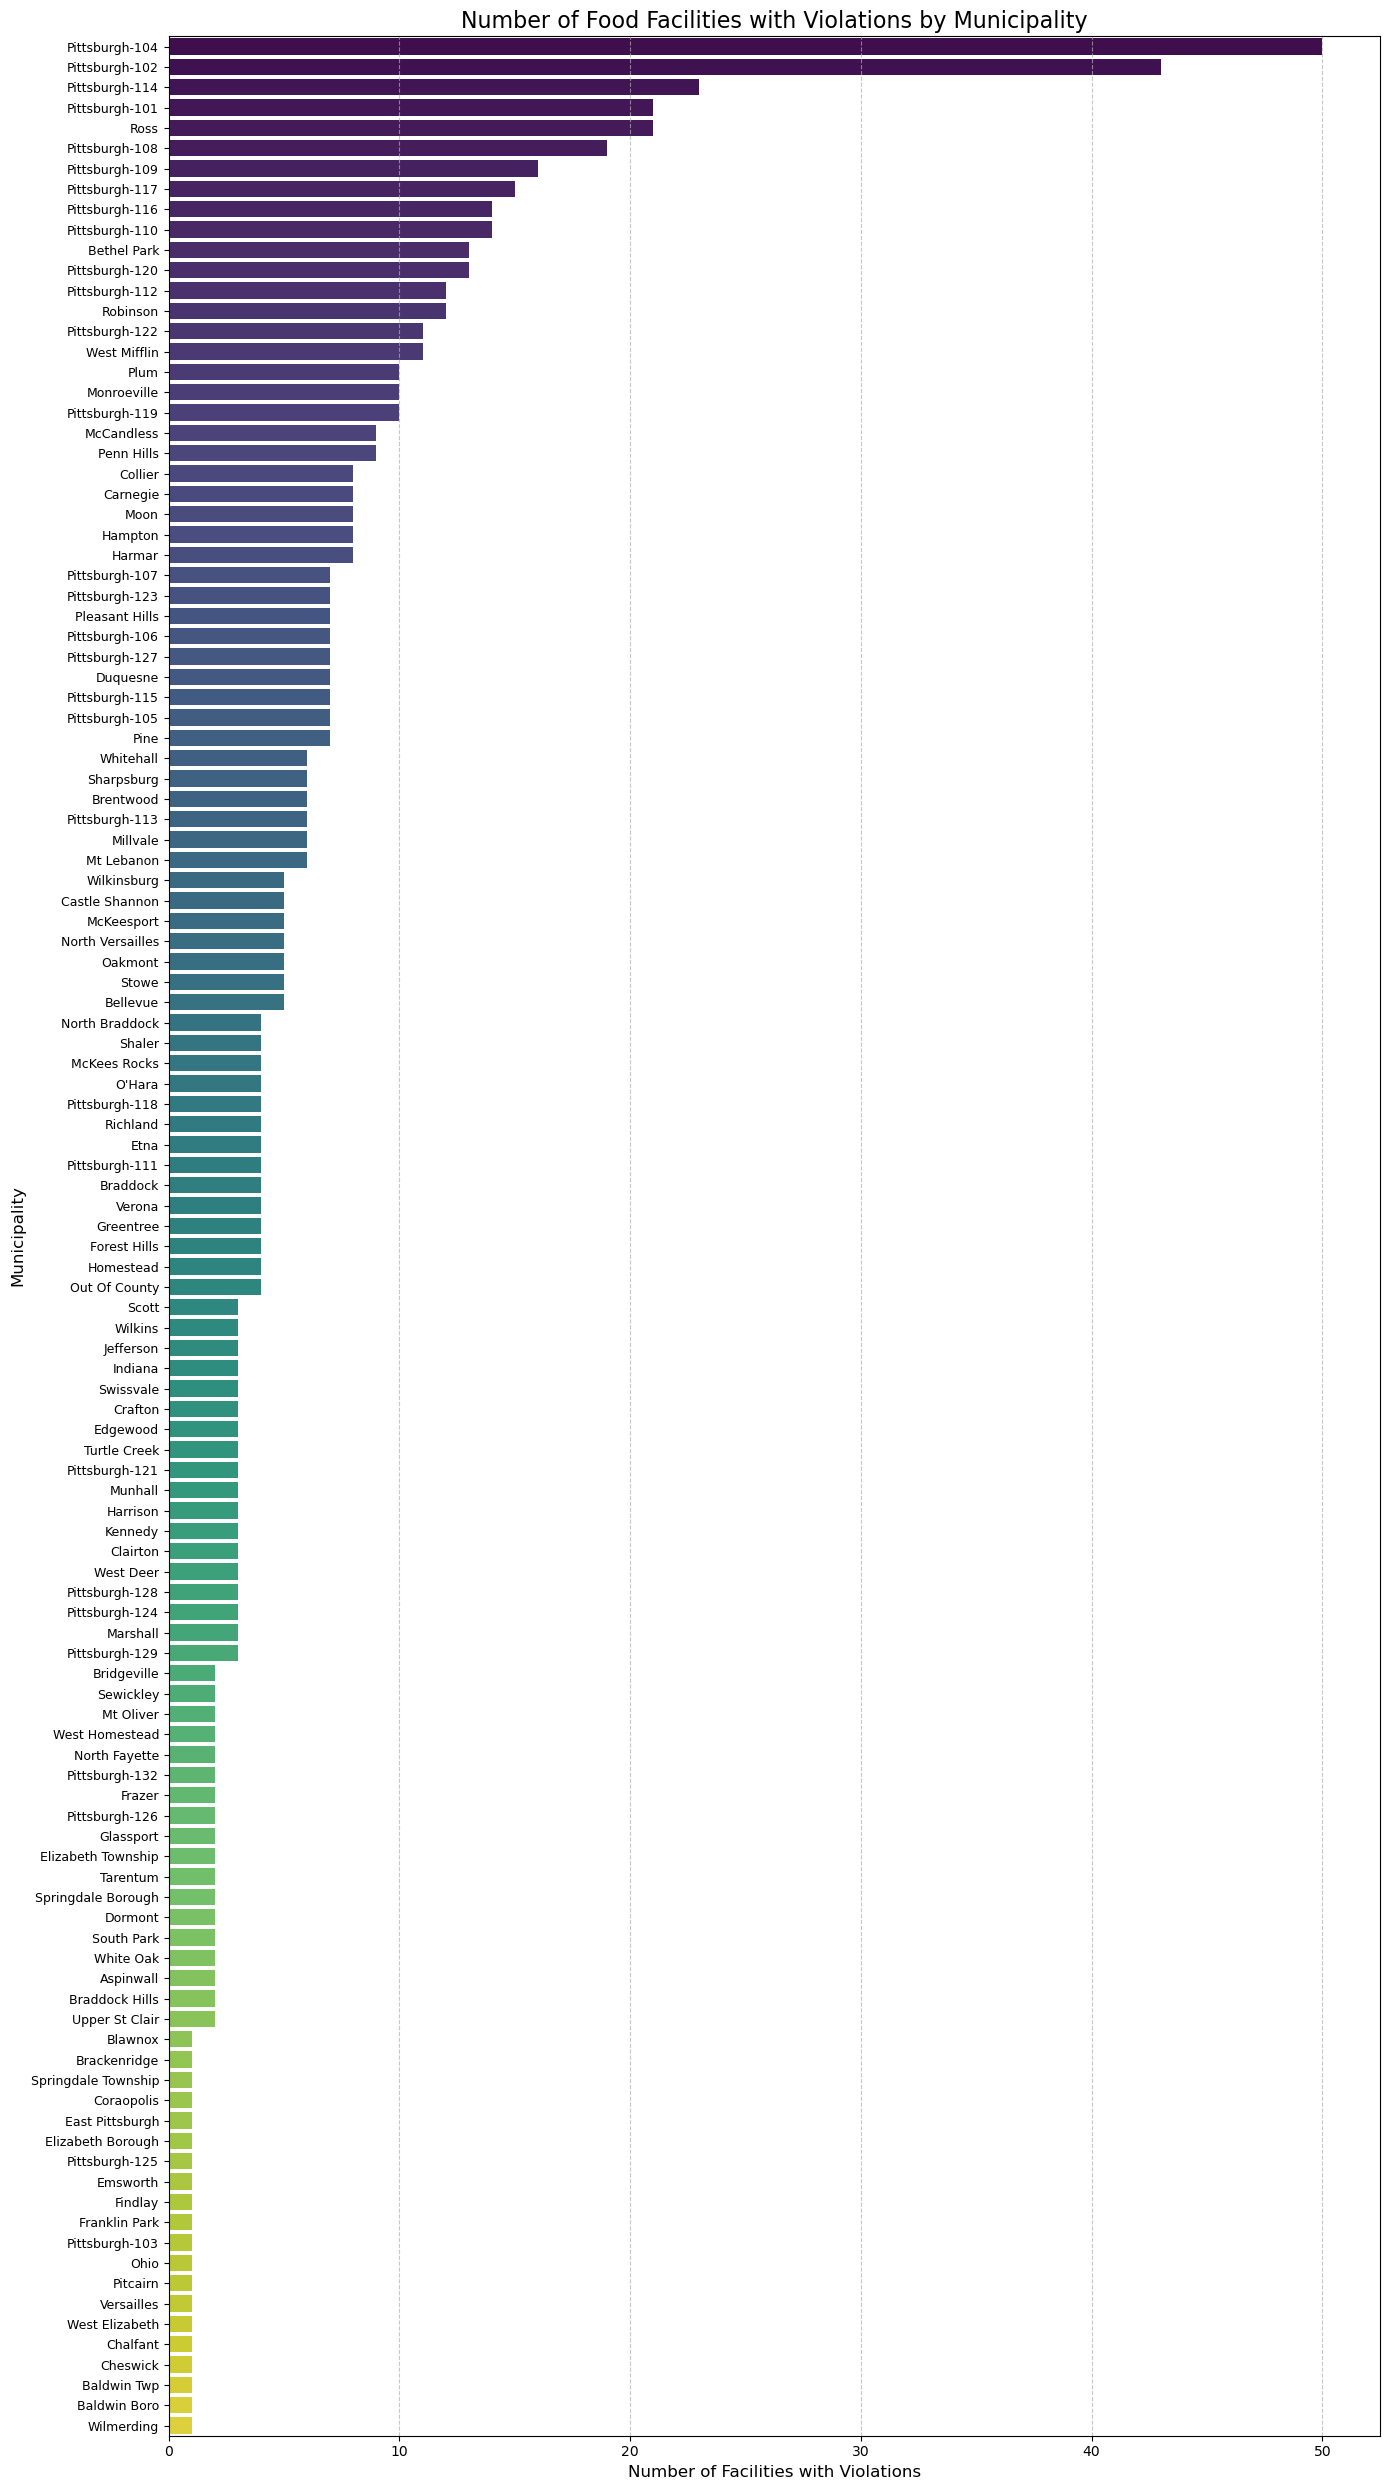

In [6]:
plt.figure(figsize=(14, 25))
sns.barplot(data=violation_counts, y='municipal', x='ViolationFacilityCount', palette='viridis')
plt.title("Number of Food Facilities with Violations by Municipality", fontsize=16)
plt.xlabel("Number of Facilities with Violations", fontsize=12)
plt.ylabel("Municipality", fontsize=12)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
all_municipalities = set(df_clean['municipal'].unique())
violation_municipalities = set(df_violations['municipal'].unique())

no_violation_municipalities = sorted(all_municipalities - violation_municipalities)

print(no_violation_municipalities)

['Aleppo', 'Avalon', 'Bell Acres', 'Ben Avon', 'Ben Avon Hgts', 'Bradford Woods', 'Churchill', 'Crescent', 'Dravosburg', 'East Deer', 'East McKeesport', 'Edgeworth', 'Fawn', 'Forward', 'Fox Chapel', 'Glenfield', 'Hays', 'Heidelberg', 'Ingram', 'Kilbuck', 'Leet', 'Leetsdale', 'Liberty Boro', 'Lincoln', 'McDonald', 'Neville', 'Oakdale', 'Osborne', 'Pennsbury Village', 'Pittsburgh-130', 'Pittsburgh-131', 'Portvue', 'Rankin', 'Reserve', 'Rosslyn Farms', 'South Fayette', 'Thornburg', 'Unspecified', 'Wall', 'West View', 'Whitaker']


In [9]:
neighborhoods = sorted(df_clean['municipal'].unique())
print(neighborhoods)

['Aleppo', 'Aspinwall', 'Avalon', 'Baldwin Boro', 'Baldwin Twp', 'Bell Acres', 'Bellevue', 'Ben Avon', 'Ben Avon Hgts', 'Bethel Park', 'Blawnox', 'Brackenridge', 'Braddock', 'Braddock Hills', 'Bradford Woods', 'Brentwood', 'Bridgeville', 'Carnegie', 'Castle Shannon', 'Chalfant', 'Cheswick', 'Churchill', 'Clairton', 'Collier', 'Coraopolis', 'Crafton', 'Crescent', 'Dormont', 'Dravosburg', 'Duquesne', 'East Deer', 'East McKeesport', 'East Pittsburgh', 'Edgewood', 'Edgeworth', 'Elizabeth Borough', 'Elizabeth Township', 'Emsworth', 'Etna', 'Fawn', 'Findlay', 'Forest Hills', 'Forward', 'Fox Chapel', 'Franklin Park', 'Frazer', 'Glassport', 'Glenfield', 'Greentree', 'Hampton', 'Harmar', 'Harrison', 'Hays', 'Heidelberg', 'Homestead', 'Indiana', 'Ingram', 'Jefferson', 'Kennedy', 'Kilbuck', 'Leet', 'Leetsdale', 'Liberty Boro', 'Lincoln', 'Marshall', 'McCandless', 'McDonald', 'McKees Rocks', 'McKeesport', 'Millvale', 'Monroeville', 'Moon', 'Mt Lebanon', 'Mt Oliver', 'Munhall', 'Neville', 'North Br

In [10]:
neighborhoods = sorted(df_clean['placard_desc'].unique())
print(neighborhoods)

['Closure/Imminent Hazard', 'Closure/No Entry', 'Closure/Unpaid Fees', 'Consumer Alert', 'Inspected & Permitted', 'Inspected/Permit denied', 'Not Selected', 'Ordered To Close']
